# Forecasting of daily River Discharge (RD) based on previous River Discharge

### Import of libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
from sklearn import linear_model,preprocessing
from sklearn.metrics import mean_squared_error, r2_score

### Load information from csv


In [2]:
data=pd.read_csv("RD_data/RD_AntuaR_pg.csv")

data.head()
dataV = data.values
dates = dataV[:,0]
plotDates = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]
rd = dataV[:,1]
temp = dataV[:,2]
prec = dataV[:,3]

### Normalization

In [3]:
x = np.array([rd[1:-1],rd[0:-2]]) 
x = x.transpose()
scaler = preprocessing.StandardScaler().fit(x)

x_normalized = scaler.transform(x)
print(x_normalized.shape)
y = rd[2:]
print(y.shape)


(1579, 2)
(1579,)


### Training and test segmentation

In [4]:

rdTests = x_normalized[:315]
rdVal = x_normalized[315:631]
rdTrain = x_normalized[631:]
yTests = y[:315]
yVal = y[315:631]
yTrain = y[631:]


### Linear regression

In [5]:

reg = linear_model.LinearRegression()
reg.fit(rdTrain,yTrain)

predict = reg.predict(rdTests)

Results

R-squared (R2): 0.8270165581601719
MSE: 2.2850627030301967
RMSE: 1.5116423859597867


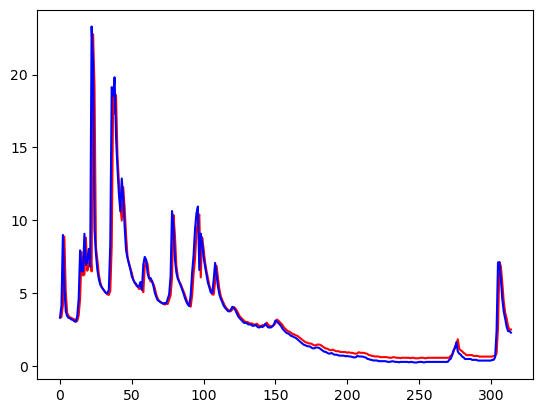

In [6]:
plt.plot(predict,'r')
plt.plot(yTests,'b')
r2 = r2_score(yTests, predict)
print("R-squared (R2):", r2)

mse = mean_squared_error(yTests, predict)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

### Ridge regression

In [28]:
reg = linear_model.Ridge(alpha=1)
reg.fit(rdTrain,yTrain)

predict = reg.predict(rdTests)

Results

R-squared (R2): 0.82697628775272
MSE: 2.2855946638070517
RMSE: 1.5118183302920531


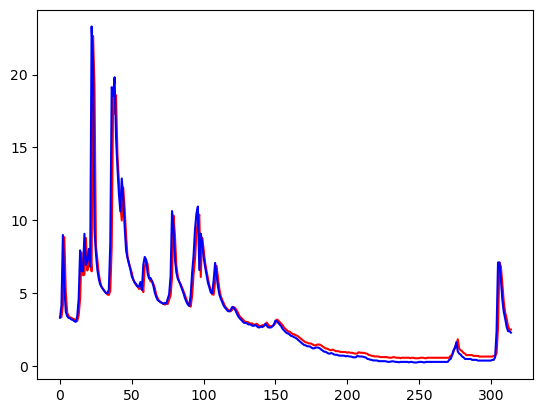

In [29]:
plt.plot(predict,'r')
plt.plot(yTests,'b')
r2 = r2_score(yTests, predict)
print("R-squared (R2):", r2)

mse = mean_squared_error(yTests, predict)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))